# Golden Opportunity for Tech Stocks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Tech Stocks
title = 'Tech'
symbols = ['AAPL','MSFT','FB','AMZN', 'NFLX', 'GOOGL', 'DOCU', 'NICE', 'PEGA', 'ZS', 'PANW', 'CYBR', 'SAIL', 'FTNT', 'TENB']
start = '2019-01-01'
end = '2022-03-25'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
3 years


In [5]:
number_of_years = delta.years

In [6]:
months = (d2.year - d1.year) * 12 + (d2.month - d1.month)
months

38

In [7]:
days = (df.index[-1] - df.index[0]).days
days

1177

In [8]:
d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")

diff = relativedelta.relativedelta(d2, d1)

years = diff.years
months = diff.months
days = diff.days

print('{} years {} months {} days'.format(years, months, days))

3 years 2 months 24 days


In [9]:
df.head()

,AAPL,MSFT,FB,AMZN,NFLX,GOOGL,DOCU,NICE,PEGA,ZS,PANW,CYBR,SAIL,FTNT,TENB
Date,,,,,,,,,,,,,,,
2019-01-02,38.277527,97.580666,135.679993,1539.130005,267.660004,1054.680054,40.820000,106.849998,47.465427,39.810001,183.210007,73.239998,23.870001,69.680000,21.450001
2019-01-03,34.464790,93.990860,131.740005,1500.280029,271.200012,1025.469971,38.830002,104.959999,46.548988,39.320000,179.699997,69.910004,22.770000,67.570000,20.549999
2019-01-04,35.936077,98.362305,137.949997,1575.390015,297.570007,1078.069946,40.900002,107.730003,48.242405,41.770000,184.389999,69.419998,24.049999,66.910004,21.170000
2019-01-07,35.856091,98.487755,138.050003,1629.510010,315.339996,1075.920044,41.689999,107.309998,49.527409,43.560001,187.350006,72.779999,25.070000,70.089996,22.879999
2019-01-08,36.539619,99.201859,142.529999,1656.579956,320.269989,1085.369995,42.080002,107.750000,50.433884,43.980000,190.429993,77.730003,25.590000,71.550003,23.389999


In [10]:
df.tail()

,AAPL,MSFT,FB,AMZN,NFLX,GOOGL,DOCU,NICE,PEGA,ZS,PANW,CYBR,SAIL,FTNT,TENB
Date,,,,,,,,,,,,,,,
2022-03-18,163.979996,300.429993,216.490005,3225.010010,380.600006,2722.510010,95.510002,220.360001,79.570000,222.710007,577.020020,157.000000,46.500000,319.970001,53.970001
2022-03-21,165.380005,299.160004,211.490005,3229.830078,374.589996,2722.030029,95.860001,217.960007,79.019997,220.860001,577.200012,158.830002,46.950001,314.529999,55.529999
2022-03-22,168.820007,304.059998,216.649994,3297.780029,382.920013,2797.360107,99.449997,221.800003,82.309998,232.389999,597.419983,167.850006,49.250000,325.690002,57.240002
2022-03-23,170.210007,299.489990,213.460007,3268.159912,374.489990,2765.510010,100.169998,216.199997,79.519997,233.380005,604.039978,170.000000,49.360001,321.429993,57.080002
2022-03-24,174.070007,304.100006,219.570007,3272.989990,375.709991,2831.439941,104.550003,218.639999,79.610001,235.789993,622.159973,169.750000,49.189999,335.709991,58.669998


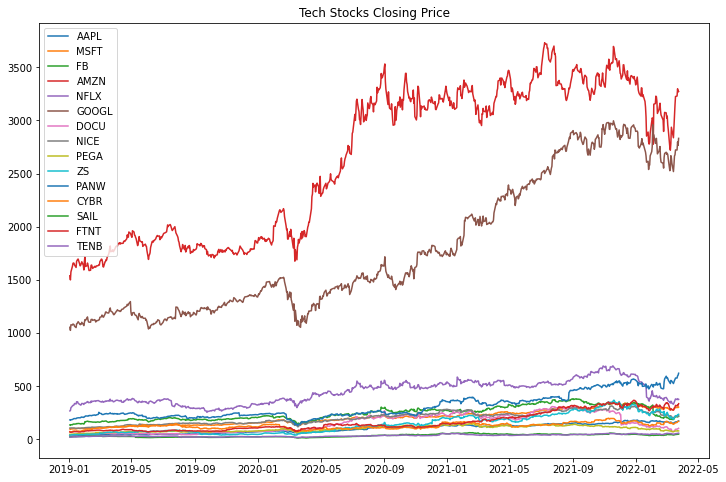

In [11]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Stocks Closing Price')
plt.legend(labels=df.columns)

In [12]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

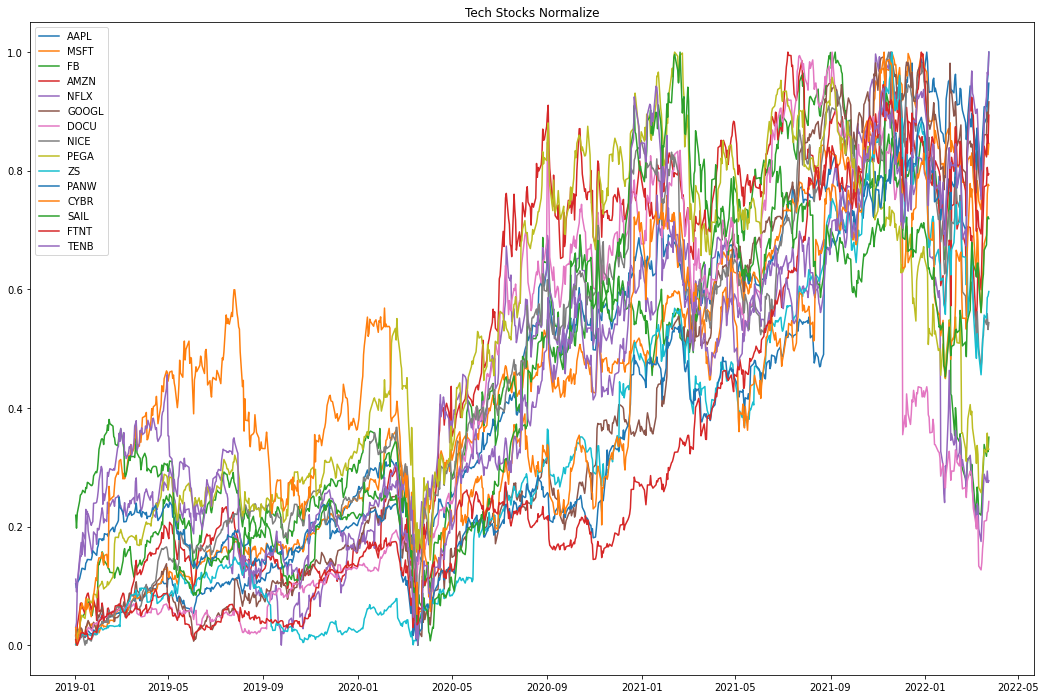

In [13]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [14]:
stock_rets = df.pct_change().dropna()

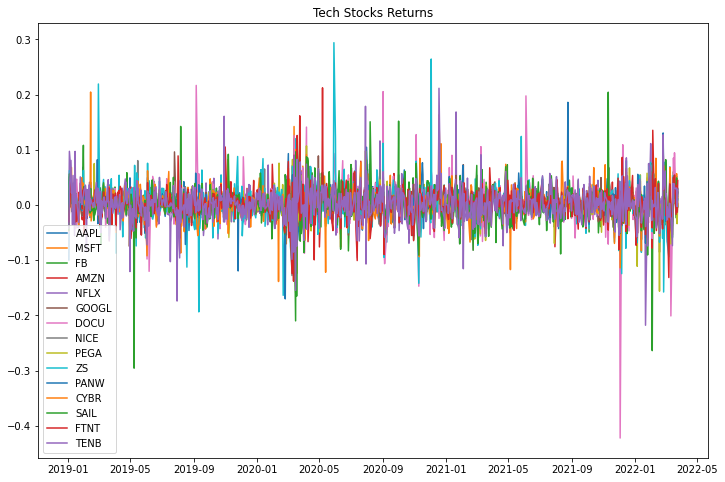

In [15]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title +' Stocks Returns')
plt.legend(labels=stock_rets.columns)

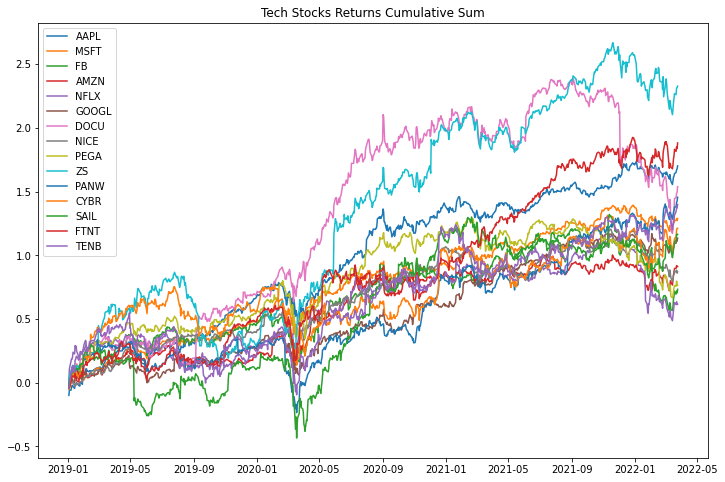

In [16]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

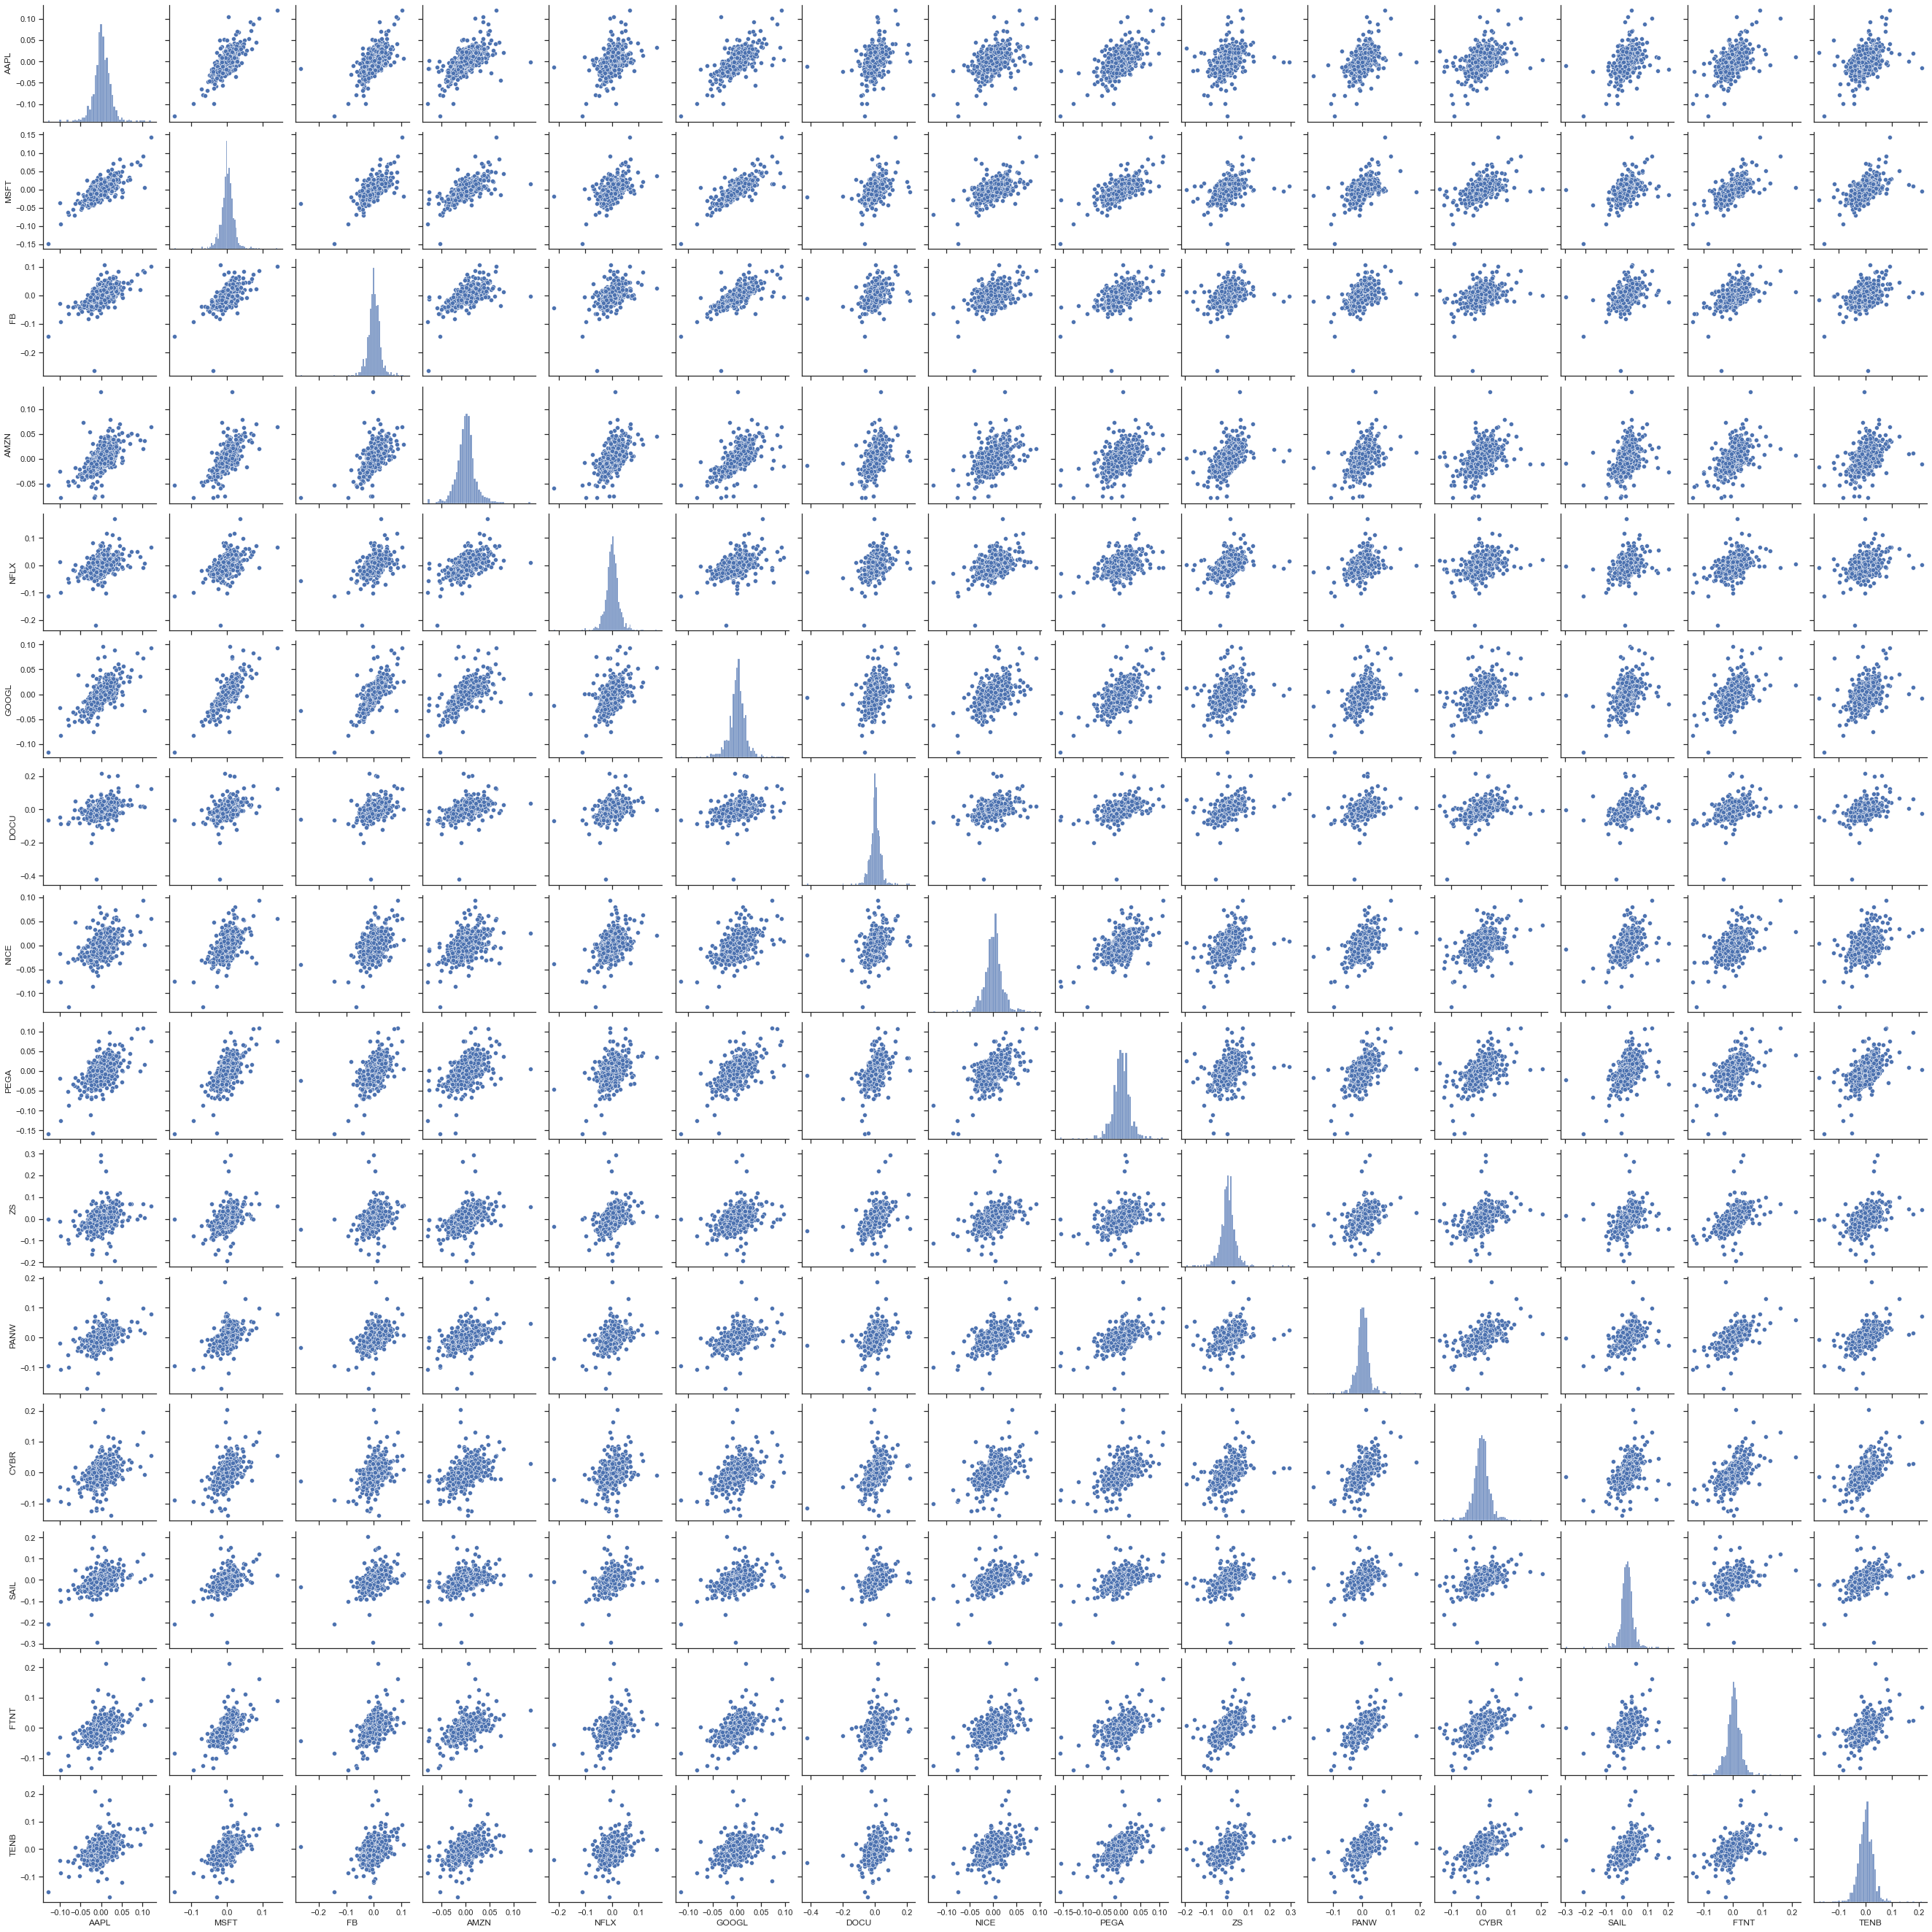

In [17]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

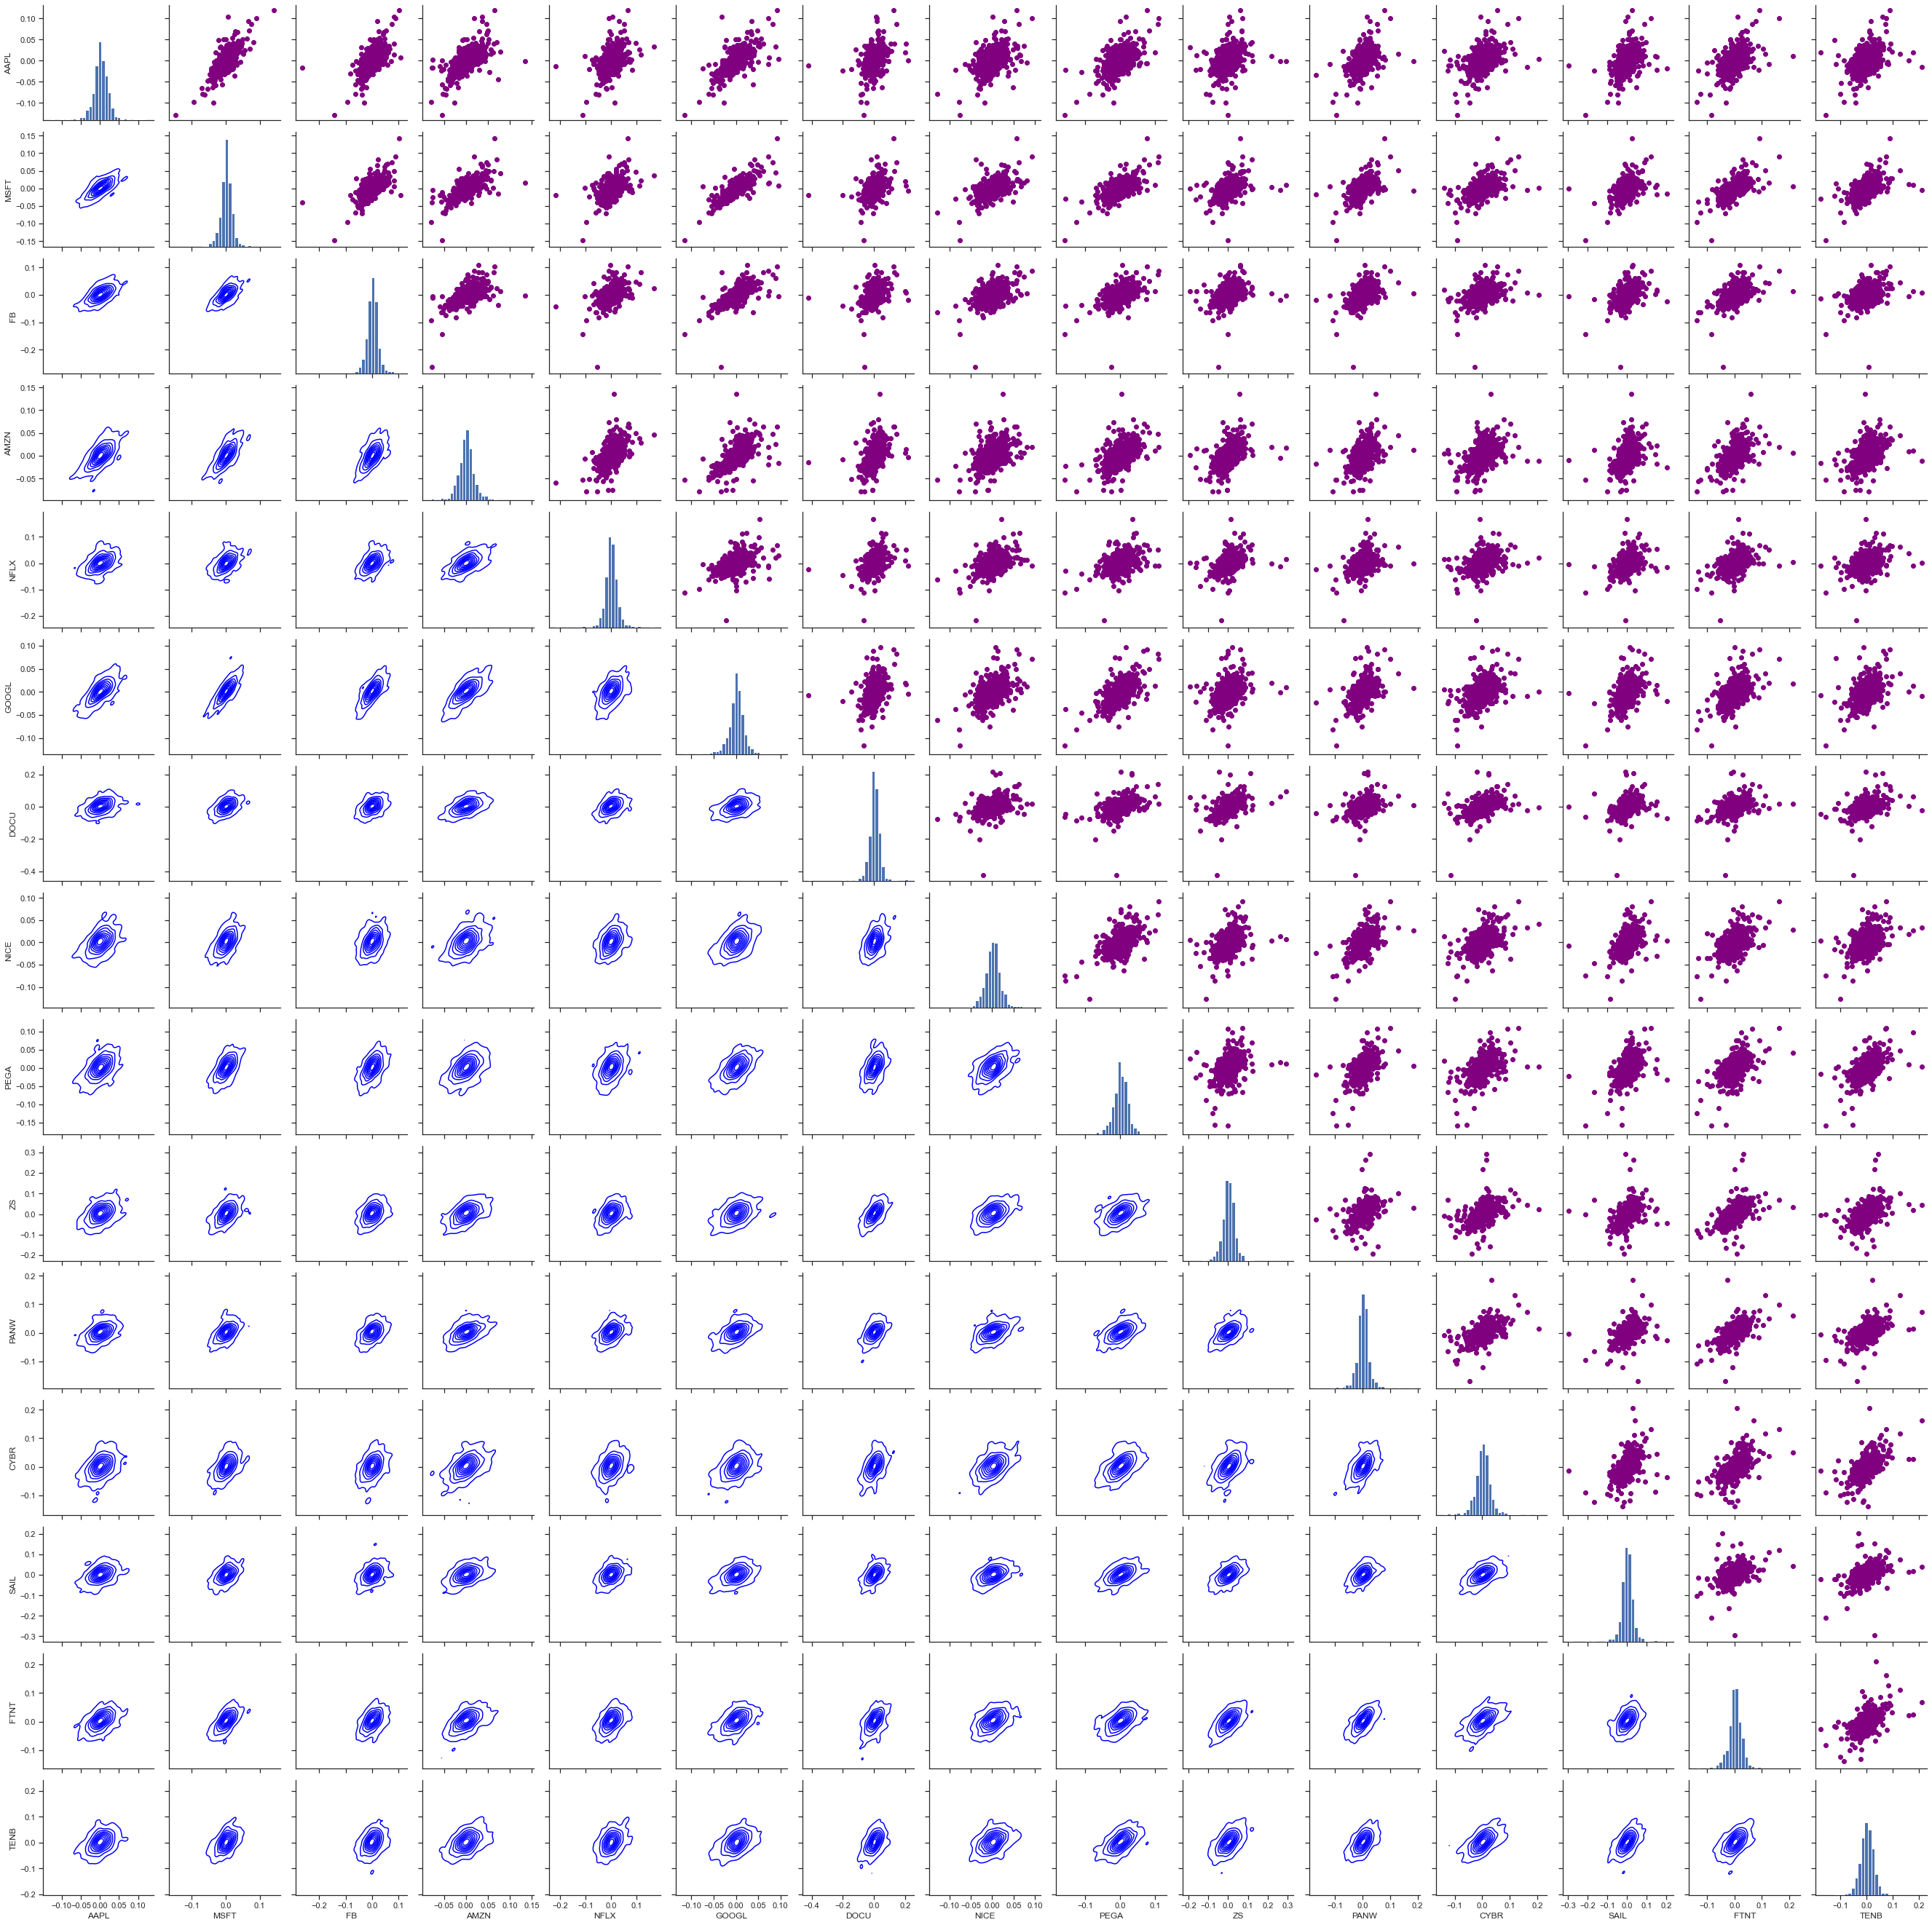

In [18]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

<AxesSubplot:>

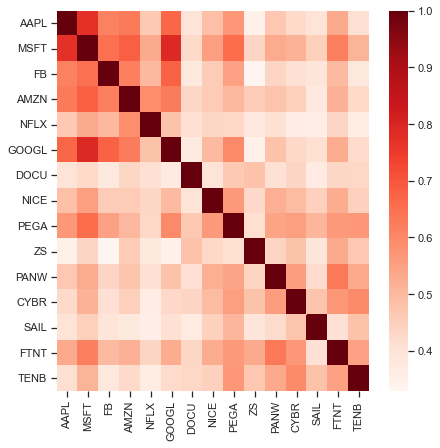

In [19]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

<AxesSubplot:>

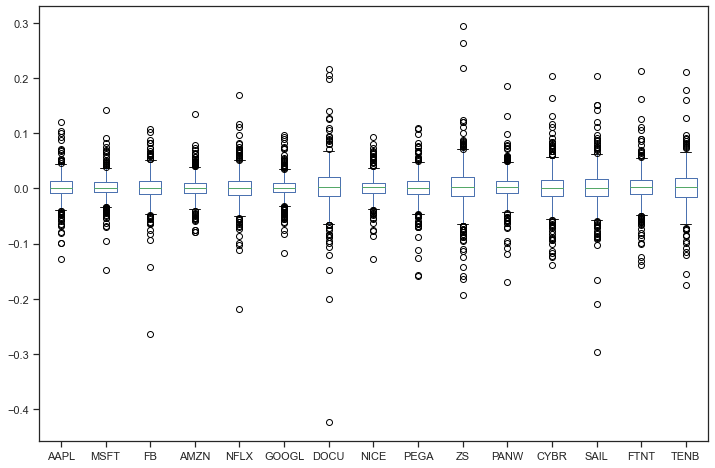

In [20]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

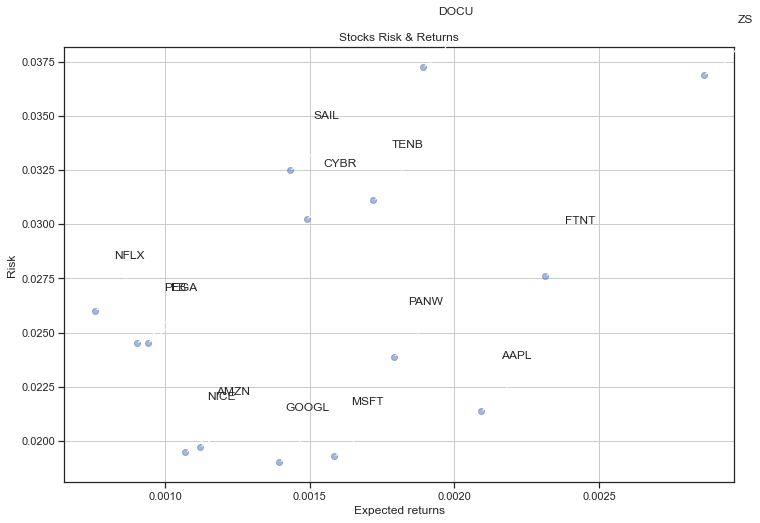

In [21]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

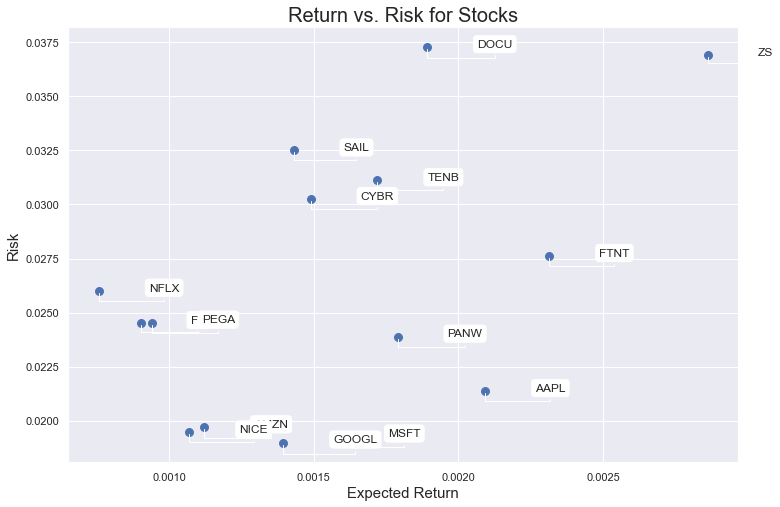

In [22]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [23]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

TENB   TENB    1.000000
FTNT   FTNT    1.000000
MSFT   MSFT    1.000000
FB     FB      1.000000
AMZN   AMZN    1.000000
                 ...   
GOOGL  ZS      0.347102
ZS     AAPL    0.345968
AAPL   ZS      0.345968
ZS     FB      0.328952
FB     ZS      0.328952
Length: 225, dtype: float64

In [24]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,AAPL,MSFT,FB,AMZN,NFLX,GOOGL,DOCU,NICE,PEGA,ZS,PANW,CYBR,SAIL,FTNT,TENB
Date,,,,,,,,,,,,,,,
2019-01-03,0.116879,0.381968,0.631240,0.251558,0.598089,0.417071,0.584598,0.498786,0.521061,0.371844,0.423869,0.271460,0.499123,0.307593,0.342614
2019-01-04,0.689607,0.669637,0.835981,0.602502,0.815476,0.788708,0.744341,0.698528,0.728988,0.524833,0.550959,0.383468,0.703716,0.366152,0.529729
2019-01-07,0.508829,0.513421,0.711236,0.529286,0.718393,0.537994,0.691134,0.561272,0.692610,0.484944,0.522748,0.544849,0.676111,0.529706,0.661007
2019-01-08,0.594514,0.534056,0.796509,0.446608,0.604321,0.588701,0.675544,0.597519,0.661492,0.416849,0.523834,0.601969,0.632772,0.453499,0.509287
2019-01-09,0.586137,0.558400,0.741345,0.377180,0.561361,0.531251,0.682847,0.523006,0.632239,0.439038,0.517189,0.388519,0.595978,0.455078,0.523553


In [25]:
Normalized_Value.corr()

,AAPL,MSFT,FB,AMZN,NFLX,GOOGL,DOCU,NICE,PEGA,ZS,PANW,CYBR,SAIL,FTNT,TENB
AAPL,1.000000,0.772661,0.615666,0.630959,0.467817,0.672333,0.398935,0.488067,0.571682,0.345968,0.470123,0.426189,0.402160,0.530869,0.412876
MSFT,0.772661,1.000000,0.652736,0.685129,0.531160,0.791160,0.426958,0.556670,0.658919,0.437618,0.530318,0.515552,0.451376,0.621534,0.510972
FB,0.615666,0.652736,1.000000,0.617576,0.499568,0.677742,0.377059,0.458858,0.550781,0.328952,0.437806,0.408261,0.392740,0.499260,0.382298
AMZN,0.630959,0.685129,0.617576,1.000000,0.589064,0.626109,0.433871,0.460432,0.502126,0.461550,0.476915,0.450113,0.376779,0.517940,0.427141
NFLX,0.467817,0.531160,0.499568,0.589064,1.000000,0.480631,0.410586,0.434766,0.431380,0.383344,0.411622,0.360908,0.355425,0.438931,0.367761
GOOGL,0.672333,0.791160,0.677742,0.626109,0.480631,1.000000,0.371262,0.498775,0.596802,0.347102,0.481233,0.429146,0.412046,0.525628,0.424111
DOCU,0.398935,0.426958,0.377059,0.433871,0.410586,0.371262,1.000000,0.401406,0.467465,0.481842,0.408685,0.438826,0.369344,0.435366,0.433782
NICE,0.488067,0.556670,0.458858,0.460432,0.434766,0.498775,0.401406,1.000000,0.565206,0.428731,0.520972,0.494193,0.449163,0.527087,0.448815
PEGA,0.571682,0.658919,0.550781,0.502126,0.431380,0.596802,0.467465,0.565206,1.000000,0.417691,0.543981,0.556043,0.507211,0.564985,0.572324
ZS,0.345968,0.437618,0.328952,0.461550,0.383344,0.347102,0.481842,0.428731,0.417691,1.000000,0.439440,0.480951,0.393794,0.530951,0.470069


In [26]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

TENB   TENB    1.000000
FTNT   FTNT    1.000000
MSFT   MSFT    1.000000
FB     FB      1.000000
AMZN   AMZN    1.000000
                 ...   
GOOGL  ZS      0.347102
ZS     AAPL    0.345968
AAPL   ZS      0.345968
ZS     FB      0.328952
FB     ZS      0.328952
Length: 225, dtype: float64

In [27]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
AAPL     0.002093
MSFT     0.001585
FB       0.000902
AMZN     0.001121
NFLX     0.000758
GOOGL    0.001396
DOCU     0.001893
NICE     0.001071
PEGA     0.000941
ZS       0.002862
PANW     0.001790
CYBR     0.001490
SAIL     0.001431
FTNT     0.002315
TENB     0.001721
dtype: float64
--------------------------------------------------
Stock risks:
AAPL     0.021366
MSFT     0.019267
FB       0.024514
AMZN     0.019693
NFLX     0.026009
GOOGL    0.018988
DOCU     0.037274
NICE     0.019457
PEGA     0.024534
ZS       0.036920
PANW     0.023883
CYBR     0.030251
SAIL     0.032496
FTNT     0.027616
TENB     0.031121
dtype: float64


In [28]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
NFLX,0.000758,0.026009
FB,0.000902,0.024514
PEGA,0.000941,0.024534
NICE,0.001071,0.019457
AMZN,0.001121,0.019693
GOOGL,0.001396,0.018988
SAIL,0.001431,0.032496
CYBR,0.001490,0.030251
MSFT,0.001585,0.019267
TENB,0.001721,0.031121


In [29]:
table.sort_values(by='Risk')

,Returns,Risk
GOOGL,0.001396,0.018988
MSFT,0.001585,0.019267
NICE,0.001071,0.019457
AMZN,0.001121,0.019693
AAPL,0.002093,0.021366
PANW,0.001790,0.023883
FB,0.000902,0.024514
PEGA,0.000941,0.024534
NFLX,0.000758,0.026009
FTNT,0.002315,0.027616


In [30]:
rf = 0.001
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
AAPL,0.002093,0.021366,0.051155
MSFT,0.001585,0.019267,0.030353
FB,0.000902,0.024514,-0.003997
AMZN,0.001121,0.019693,0.006158
NFLX,0.000758,0.026009,-0.009304
GOOGL,0.001396,0.018988,0.020830
DOCU,0.001893,0.037274,0.023946
NICE,0.001071,0.019457,0.003630
PEGA,0.000941,0.024534,-0.002407
ZS,0.002862,0.036920,0.050434


In [31]:
table['Max Returns'] = rets.max()

In [32]:
table['Min Returns'] = rets.min()

In [33]:
table['Median Returns'] = rets.median()

In [34]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
AAPL,0.002093,0.021366,0.051155,0.119808,-0.128647,0.001560,2.267787
MSFT,0.001585,0.019267,0.030353,0.142169,-0.147390,0.001370,1.539289
FB,0.000902,0.024514,-0.003997,0.108164,-0.263901,0.001001,2.862363
AMZN,0.001121,0.019693,0.006158,0.135359,-0.079221,0.001215,0.147792
NFLX,0.000758,0.026009,-0.009304,0.168543,-0.217905,0.000804,0.325777
GOOGL,0.001396,0.018988,0.020830,0.096202,-0.116342,0.001537,2.384006
DOCU,0.001893,0.037274,0.023946,0.216649,-0.422248,0.002102,4.372572
NICE,0.001071,0.019457,0.003630,0.092920,-0.127761,0.001793,1.128586
PEGA,0.000941,0.024534,-0.002407,0.108961,-0.158857,0.001221,0.113184
ZS,0.002862,0.036920,0.050434,0.294063,-0.193669,0.003510,1.032646


In [35]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
AAPL,0.002093,0.021366,0.051155,0.119808,-0.128647,0.001560,2.267787,0.000935
MSFT,0.001585,0.019267,0.030353,0.142169,-0.147390,0.001370,1.539289,0.000637
FB,0.000902,0.024514,-0.003997,0.108164,-0.263901,0.001001,2.862363,0.001177
AMZN,0.001121,0.019693,0.006158,0.135359,-0.079221,0.001215,0.147792,0.000062
NFLX,0.000758,0.026009,-0.009304,0.168543,-0.217905,0.000804,0.325777,0.000136
GOOGL,0.001396,0.018988,0.020830,0.096202,-0.116342,0.001537,2.384006,0.000982
DOCU,0.001893,0.037274,0.023946,0.216649,-0.422248,0.002102,4.372572,0.001785
NICE,0.001071,0.019457,0.003630,0.092920,-0.127761,0.001793,1.128586,0.000468
PEGA,0.000941,0.024534,-0.002407,0.108961,-0.158857,0.001221,0.113184,0.000047
ZS,0.002862,0.036920,0.050434,0.294063,-0.193669,0.003510,1.032646,0.000428


In [36]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
AAPL,0.002093,0.021366,0.051155,0.119808,-0.128647,0.001560,2.267787,0.000935,8.066604e+06
MSFT,0.001585,0.019267,0.030353,0.142169,-0.147390,0.001370,1.539289,0.000637,1.525282e+05
FB,0.000902,0.024514,-0.003997,0.108164,-0.263901,0.001001,2.862363,0.001177,1.557114e+02
AMZN,0.001121,0.019693,0.006158,0.135359,-0.079221,0.001215,0.147792,0.000062,2.756582e+03
NFLX,0.000758,0.026009,-0.009304,0.168543,-0.217905,0.000804,0.325777,0.000136,3.418255e+01
GOOGL,0.001396,0.018988,0.020830,0.096202,-0.116342,0.001537,2.384006,0.000982,3.186368e+04
DOCU,0.001893,0.037274,0.023946,0.216649,-0.422248,0.002102,4.372572,0.001785,1.944078e+04
NICE,0.001071,0.019457,0.003630,0.092920,-0.127761,0.001793,1.128586,0.000468,1.839893e+03
PEGA,0.000941,0.024534,-0.002407,0.108961,-0.158857,0.001221,0.113184,0.000047,2.271379e+02
ZS,0.002862,0.036920,0.050434,0.294063,-0.193669,0.003510,1.032646,0.000428,1.293000e+08


In [37]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
SAIL,0.001431,0.032496,0.013254,0.204357,-0.295646,0.001382,-0.344412,-0.000144,1.981695e+03
CYBR,0.001490,0.030251,0.016196,0.204677,-0.138672,0.001642,-0.147059,-0.000061,6.808972e+03
PEGA,0.000941,0.024534,-0.002407,0.108961,-0.158857,0.001221,0.113184,0.000047,2.271379e+02
AMZN,0.001121,0.019693,0.006158,0.135359,-0.079221,0.001215,0.147792,0.000062,2.756582e+03
NFLX,0.000758,0.026009,-0.009304,0.168543,-0.217905,0.000804,0.325777,0.000136,3.418255e+01
ZS,0.002862,0.036920,0.050434,0.294063,-0.193669,0.003510,1.032646,0.000428,1.293000e+08
NICE,0.001071,0.019457,0.003630,0.092920,-0.127761,0.001793,1.128586,0.000468,1.839893e+03
MSFT,0.001585,0.019267,0.030353,0.142169,-0.147390,0.001370,1.539289,0.000637,1.525282e+05
AAPL,0.002093,0.021366,0.051155,0.119808,-0.128647,0.001560,2.267787,0.000935,8.066604e+06
GOOGL,0.001396,0.018988,0.020830,0.096202,-0.116342,0.001537,2.384006,0.000982,3.186368e+04


In [38]:
table['var_99'] = round((rets).quantile(0.01), 3)
table['var_95'] = round((rets).quantile(0.05), 3)

In [39]:
table.sort_values(by='Returns')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR,var_99,var_95
NFLX,0.000758,0.026009,-0.009304,0.168543,-0.217905,0.000804,0.325777,0.000136,3.418255e+01,-0.065,-0.037
FB,0.000902,0.024514,-0.003997,0.108164,-0.263901,0.001001,2.862363,0.001177,1.557114e+02,-0.061,-0.036
PEGA,0.000941,0.024534,-0.002407,0.108961,-0.158857,0.001221,0.113184,0.000047,2.271379e+02,-0.067,-0.036
NICE,0.001071,0.019457,0.003630,0.092920,-0.127761,0.001793,1.128586,0.000468,1.839893e+03,-0.046,-0.030
AMZN,0.001121,0.019693,0.006158,0.135359,-0.079221,0.001215,0.147792,0.000062,2.756582e+03,-0.054,-0.029
GOOGL,0.001396,0.018988,0.020830,0.096202,-0.116342,0.001537,2.384006,0.000982,3.186368e+04,-0.051,-0.029
SAIL,0.001431,0.032496,0.013254,0.204357,-0.295646,0.001382,-0.344412,-0.000144,1.981695e+03,-0.086,-0.042
CYBR,0.001490,0.030251,0.016196,0.204677,-0.138672,0.001642,-0.147059,-0.000061,6.808972e+03,-0.092,-0.043
MSFT,0.001585,0.019267,0.030353,0.142169,-0.147390,0.001370,1.539289,0.000637,1.525282e+05,-0.048,-0.028
TENB,0.001721,0.031121,0.023163,0.211449,-0.174028,0.002406,2.785558,0.001145,3.875884e+04,-0.084,-0.043


In [40]:
# Pure Profit Score
df = df.dropna()
t = np.arange(0, df.shape[0]).reshape(-1, 1)
regression = LinearRegression().fit(t, df)
r_squared = regression.score(t, df)
table['PPS'] = table['CAGR'] * r_squared

In [41]:
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR,var_99,var_95,PPS
AAPL,0.002093,0.021366,0.051155,0.119808,-0.128647,0.001560,2.267787,0.000935,8.066604e+06,-0.058,-0.030,5.911433e+06
MSFT,0.001585,0.019267,0.030353,0.142169,-0.147390,0.001370,1.539289,0.000637,1.525282e+05,-0.048,-0.028,1.117769e+05
FB,0.000902,0.024514,-0.003997,0.108164,-0.263901,0.001001,2.862363,0.001177,1.557114e+02,-0.061,-0.036,1.141097e+02
AMZN,0.001121,0.019693,0.006158,0.135359,-0.079221,0.001215,0.147792,0.000062,2.756582e+03,-0.054,-0.029,2.020100e+03
NFLX,0.000758,0.026009,-0.009304,0.168543,-0.217905,0.000804,0.325777,0.000136,3.418255e+01,-0.065,-0.037,2.504993e+01
GOOGL,0.001396,0.018988,0.020830,0.096202,-0.116342,0.001537,2.384006,0.000982,3.186368e+04,-0.051,-0.029,2.335059e+04
DOCU,0.001893,0.037274,0.023946,0.216649,-0.422248,0.002102,4.372572,0.001785,1.944078e+04,-0.087,-0.050,1.424675e+04
NICE,0.001071,0.019457,0.003630,0.092920,-0.127761,0.001793,1.128586,0.000468,1.839893e+03,-0.046,-0.030,1.348325e+03
PEGA,0.000941,0.024534,-0.002407,0.108961,-0.158857,0.001221,0.113184,0.000047,2.271379e+02,-0.067,-0.036,1.664530e+02
ZS,0.002862,0.036920,0.050434,0.294063,-0.193669,0.003510,1.032646,0.000428,1.293000e+08,-0.093,-0.051,9.475462e+07
